### Initial Method of BackGround and Foreground Segmentation by separating them through grey scale

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
os.chdir('..\Project')

#### Reading and displaying the image

(Text(0.5, 1.0, 'Original Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

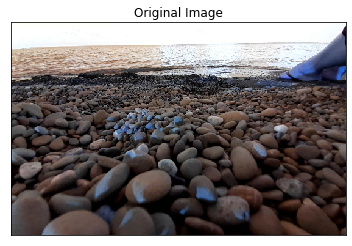

In [2]:
img = cv2.imread('First.jpg')
img.shape
img = cv2.resize(img, (550, 350))
plt.subplot(),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Background Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

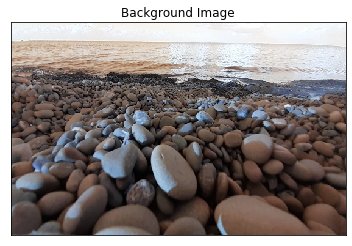

In [3]:
img2 = cv2.imread('Second.jpg')
img2 = cv2.resize(img2, (550, 350))
plt.subplot(),plt.imshow(img2,cmap = 'gray')
plt.title('Background Image'), plt.xticks([]), plt.yticks([])

#### Converting it to Grey Scale

(Text(0.5, 1.0, 'Gray_Scale'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

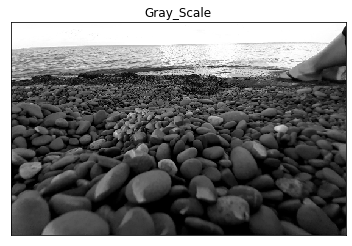

In [4]:
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(),plt.imshow(g_img,cmap = 'gray')
plt.title('Gray_Scale'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Gray_Scale-Second image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

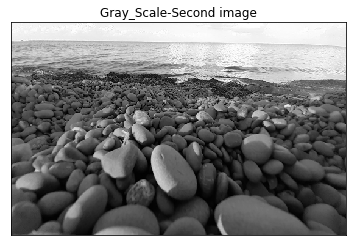

In [5]:
img_2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.subplot(),plt.imshow(img_2,cmap = 'gray')
plt.title('Gray_Scale-Second image'), plt.xticks([]), plt.yticks([])

#### Finding out the Shape (Pixels)

In [6]:
height, width=img.shape[0:2]
print(height, width)

350 550


#### Setting the threshold value for the image 

In [7]:
_, thresh = cv2.threshold(g_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [8]:
img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [9]:
img_contours = sorted(img_contours, key=cv2.contourArea)
for i in img_contours:
    if cv2.contourArea(i) > 100:
        break

#### Masking of the image

In [10]:
mask = np.zeros(img.shape[:2], np.uint8)
cv2.drawContours(mask, [i], -1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Bitwise Operations for adding 

In [11]:
new_img = cv2.bitwise_and(img, img2, mask=mask)

#### Result of operation



(Text(0.5, 1.0, 'BitWise Operation'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

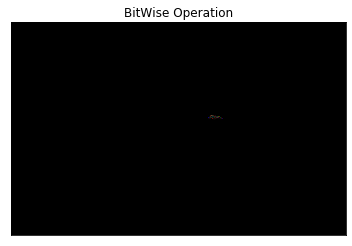

In [12]:
plt.subplot(),plt.imshow(new_img,cmap = 'gray')
plt.title('BitWise Operation'), plt.xticks([]), plt.yticks([])

#### Edge detection through Canny Method

(Text(0.5, 1.0, 'Canny Method'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

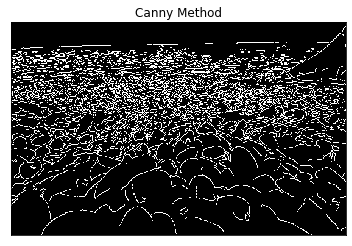

In [20]:
edge_img=cv2.Canny(g_img,100,200)
plt.subplot(),plt.imshow(edge_img,cmap = 'gray')
plt.title('Canny Method'), plt.xticks([]), plt.yticks([])

#### Edge detection through Sobel Method

In [16]:
sobelx = cv2.Sobel(g_img,cv2.CV_64F,1,0,ksize=7)
sobely = cv2.Sobel(g_img,cv2.CV_64F,0,1,ksize=7)


(Text(0.5, 1.0, 'Sobel X'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

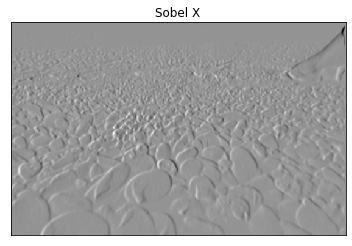

In [17]:
plt.subplot(),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

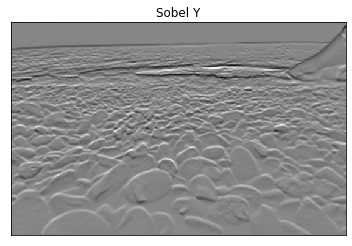

In [18]:
plt.subplot(),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

#### Creating a Gaussian Blur

(Text(0.5, 1.0, 'Blurred Original Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

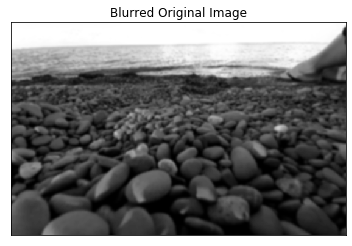

In [23]:
bimg = cv2.GaussianBlur(g_img, (7,7), 0) 
plt.subplot(),plt.imshow(bimg,cmap = 'gray')
plt.title('Blurred Original Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Blurred Background Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

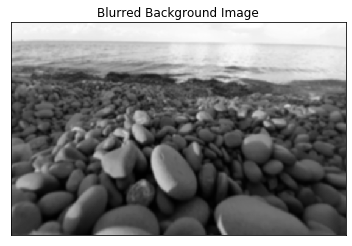

In [24]:
bimg2 =cv2.GaussianBlur(img_2,(7,7),0)
plt.subplot(),plt.imshow(bimg2,cmap = 'gray')
plt.title('Blurred Background Image'), plt.xticks([]), plt.yticks([])

#### Performing sobel after blurring also

In [25]:
sobelx = cv2.Sobel(bimg,cv2.CV_64F,1,0,ksize=7)
sobely = cv2.Sobel(bimg2,cv2.CV_64F,0,1,ksize=7)


In [ ]:
cv2.imshow("Sobel X", sobelx)
cv2.waitKey(0)

In [ ]:
cv2.imshow("Sobel Y", sobely)
cv2.waitKey(0)

(Text(0.5, 1.0, 'Sobel X'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

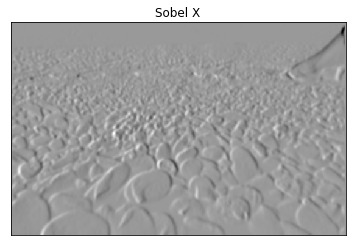

In [26]:
plt.subplot(),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

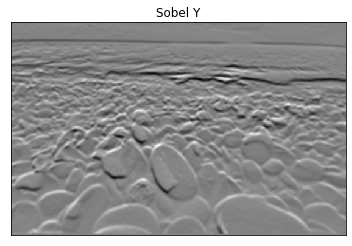

In [27]:
plt.subplot(),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

#### Canny() of Edge Detection


(Text(0.5, 1.0, 'Canny_Method'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

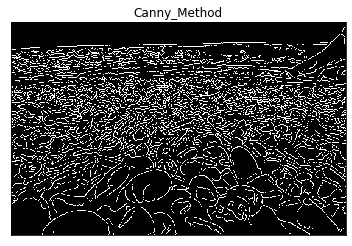

In [28]:
edge_img = cv2.Canny(bimg,5,50)
cv2.imshow("Detected Edges", edge_img)
plt.subplot(),plt.imshow(edge_img,cmap = 'gray')
plt.title('Canny_Method'), plt.xticks([]), plt.yticks([])

In [ ]:
#plt.imshow(edge_img, cmap = 'gray')

### Image subtraction

In [33]:
img3=abs(bimg2-bimg)

(Text(0.5, 1.0, 'Image Subtraction'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

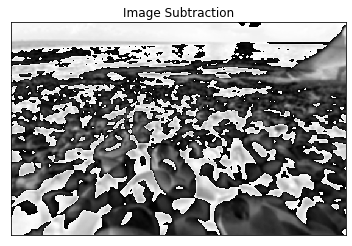

In [34]:
plt.subplot(),plt.imshow(img3,cmap = 'gray')
plt.title('Image Subtraction'), plt.xticks([]), plt.yticks([])